In [0]:
import tensorflow as tf
tf.enable_eager_execution()

In [2]:
x = tf.zeros([10, 10])
x += 2

print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [0]:
v = tf.Variable(1.0)
assert v.numpy() == 1.0

v.assign(3.0)
assert v.numpy() == 3.0

v.assign(tf.square(v))
assert v.numpy() == 9.0

Example: Fitting a linear model
Let's now put the few concepts we have so far ---Tensor, GradientTape, Variable --- to build and train a simple model. This typically involves a few steps:

Define the model.

Define a loss function.

Obtain training data.

Run through the training data and use an "optimizer" to adjust the variables to fit the data.

In [0]:
class Model (object):
  def __init__(self):
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)
    
  def __call__(self, x):
    return self.W * x + self.b

model = Model ()
assert model(3.0).numpy() == 15.0

In [0]:
def loss(predicted_y, desired_y):
  return tf.reduce_mean(tf.square(predicted_y - desired_y))

In [0]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random_normal(shape=[NUM_EXAMPLES])
noise  = tf.random_normal(shape=[NUM_EXAMPLES])
output = inputs * TRUE_W + TRUE_b + noise

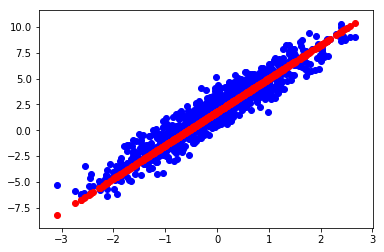

Current loss: 
1.0244582


In [49]:
import matplotlib.pyplot as plt

plt.scatter(inputs, output, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: '),
print(loss(model(inputs), output).numpy())

In [0]:
def train(model, inputs, output, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), output)
  dW, db = t.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=9.39988
Epoch  1: W=4.58 b=0.43, loss=6.17739
Epoch  2: W=4.24 b=0.76, loss=4.17903
Epoch  3: W=3.98 b=1.02, loss=2.93980
Epoch  4: W=3.77 b=1.23, loss=2.17131
Epoch  5: W=3.61 b=1.39, loss=1.69475
Epoch  6: W=3.48 b=1.52, loss=1.39922
Epoch  7: W=3.38 b=1.62, loss=1.21595
Epoch  8: W=3.30 b=1.70, loss=1.10230
Epoch  9: W=3.23 b=1.76, loss=1.03182


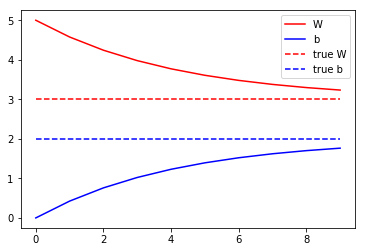

In [53]:
model = Model()

Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), output)
  
  train(model, inputs, output, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
       (epoch, Ws[-1], bs[-1], current_loss))
  
plt.plot(epochs, Ws,'r',
         epochs, bs,'b')

plt.plot([TRUE_W] * len(epochs), 'r--' ,
         [TRUE_b] * len(epochs), 'b--')

plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()